Aggregation in Pandas refers to the process of combining multiple pieces of data into a summary form, usually for the purposes of analysis. This is often done using functions that summarize a collection of data into a single value, such as sum(), mean(), median(), min(), max(), and count(). Aggregation can be performed on Series, DataFrame columns, or across multiple columns in DataFrames.

# Example 1: Aggregating a Series

In [1]:
import pandas as pd

# Create a Pandas Series
data = pd.Series([1, 2, 3, 4, 5])

# Aggregate using sum
total = data.sum()

print("Sum:", total)

# Aggregate using mean
average = data.mean()

print("Mean:", average)


Sum: 15
Mean: 3.0


# Example 2: Aggregating a DataFrame Column

In [2]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

# Aggregate column 'A' using sum
total_A = df['A'].sum()

print("Sum of Column A:", total_A)

# Aggregate column 'B' using mean
average_B = df['B'].mean()

print("Mean of Column B:", average_B)


Sum of Column A: 15
Mean of Column B: 30.0


# Example 3: Aggregating Multiple Columns in a DataFrame

In [3]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [5, 4, 3, 2, 1]
})

# Aggregate using multiple functions
result = df.aggregate({
    'A': ['sum', 'min'],
    'B': ['max', 'mean'],
    'C': ['median']
})

print(result)


           A     B    C
sum     15.0   NaN  NaN
min      1.0   NaN  NaN
max      NaN  50.0  NaN
mean     NaN  30.0  NaN
median   NaN   NaN  3.0


In [4]:
# df.aggregate()

Pandas provides a variety of methods for aggregation, allowing for comprehensive data analysis and summarization. Here's a list of common aggregation methods available in Pandas:

1. count(): Counts the number of non-NA/null observations.
2. sum(): Sums up the values.
3. mean(): Computes the mean of the values.
4. median(): Finds the median of the values.
5. min(): Identifies the minimum value.
6. max(): Identifies the maximum value.
7. std(): Calculates the standard deviation of the values.
8. var(): Calculates the variance of the values.
9. sem(): Calculates the standard error of the mean of the values.
10. mad(): Computes the mean absolute deviation from the mean.
11. prod(): Computes the product of the values.
12. first(): Returns the first item.
13. last(): Returns the last item.
14. quantile(q): Computes the qth quantile of the data for given q (0 <= q <= 1).
15. mode(): Finds the mode(s) of the dataset.
16. abs(): Takes the absolute value of all data.
17. cumsum(): Computes the cumulative sum of the data.
18. cumprod(): Computes the cumulative product of the data.
19. cummax(): Computes the cumulative maximum of the data.
20. cummin(): Computes the cumulative minimum of the data.
21. nunique(): Counts the number of unique non-NA/null values.
22. describe(): Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.

# Pandas groupby

The groupby operation in Pandas is a powerful tool for grouping data based on some criteria, and then applying a function to each group independently. This operation allows for complex data transformations and analyses. The process of groupby typically involves splitting the data into groups based on some criteria, applying a function to each group, and then combining the results into a data structure.

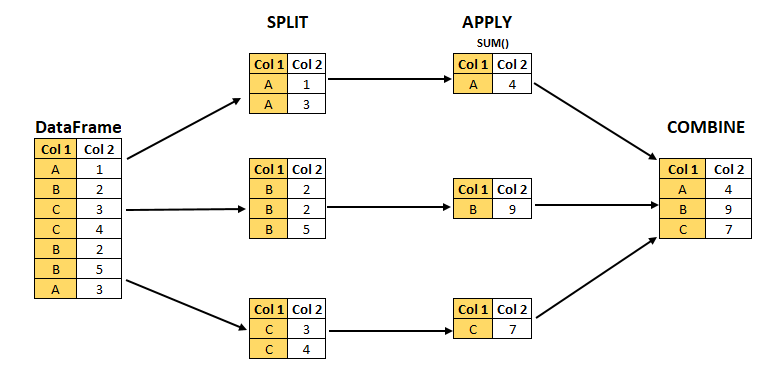

# Example 1: Basic Grouping and Aggregation

In [7]:
import pandas as pd

# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'A'],
    'Sales': [100, 200, 150, 300, 250, 50, 400, 100]
}
df = pd.DataFrame(data)

# Group by 'Category' and sum 'Sales'
grouped = df.groupby('Category')['Sales'].sum()

print(grouped)


Category
A    400
B    450
C    700
Name: Sales, dtype: int64


In [13]:
groupedtest = df.groupby('Category')

In [15]:
list(groupedtest)

[('A',
    Category  Sales
  0        A    100
  2        A    150
  5        A     50
  7        A    100),
 ('B',
    Category  Sales
  1        B    200
  4        B    250),
 ('C',
    Category  Sales
  3        C    300
  6        C    400)]

In [17]:
list(groupedtest.Sales)

[('A',
  0    100
  2    150
  5     50
  7    100
  Name: Sales, dtype: int64),
 ('B',
  1    200
  4    250
  Name: Sales, dtype: int64),
 ('C',
  3    300
  6    400
  Name: Sales, dtype: int64)]

# Example 2: Multiple Aggregations on Single Column

In [18]:
# Group by 'Category' and apply multiple aggregation functions to 'Sales'
grouped = df.groupby('Category')['Sales'].agg(['sum', 'mean'])

print(grouped)


          sum   mean
Category            
A         400  100.0
B         450  225.0
C         700  350.0


# Example 3: Grouping by Multiple Columns

In [19]:
# Adding a 'Year' column to the DataFrame
df['Year'] = [2020, 2020, 2021, 2020, 2021, 2021, 2020, 2021]

# Group by 'Category' and 'Year', then sum 'Sales'
grouped = df.groupby(['Category', 'Year'])['Sales'].sum()

print(grouped)


Category  Year
A         2020    100
          2021    300
B         2020    200
          2021    250
C         2020    700
Name: Sales, dtype: int64


In [21]:
# This groups the data first by 'Category' and then by 'Year' 
#within each category, calculating the sum of 'Sales' for each group.

# Example 4: Aggregating Multiple Columns

In [22]:
# Adding a 'Discount' column to the DataFrame
df['Discount'] = [5, 10, 5, 15, 10, 5, 20, 5]

# Group by 'Category' and apply different aggregations to 'Sales' and 'Discount'
grouped = df.groupby('Category').agg({'Sales': 'sum', 'Discount': 'mean'})

print(grouped)


          Sales  Discount
Category                 
A           400       5.0
B           450      10.0
C           700      17.5


In [23]:
# Practice using samplesuper store dataset

In [24]:
import pandas as pd

# Load the dataset
file_path = 'SampleSuperstore.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


C:\Users\imran\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Let's perform some groupby and aggregation operations to analyze this data:

1. Total Sales by Category: We'll calculate the total sales for each product category.
2. Average Profit by Sub-Category: We'll find the average profit for each sub-category.
3. Total Quantity Sold by Region: We'll sum up the total quantity of products sold in each region.
4. Average Discount by Segment: We'll compute the average discount given in each customer segment.

In [25]:
# Total Sales by Category
total_sales_by_category = data.groupby('Category')['Sales'].sum()

# Average Profit by Sub-Category
average_profit_by_subcategory = data.groupby('Sub-Category')['Profit'].mean()

# Total Quantity Sold by Region
total_quantity_by_region = data.groupby('Region')['Quantity'].sum()

# Average Discount by Segment
average_discount_by_segment = data.groupby('Segment')['Discount'].mean()

# Display the results
total_sales_by_category, average_profit_by_subcategory, total_quantity_by_region, average_discount_by_segment


(Category
 Furniture          741999.7953
 Office Supplies    719047.0320
 Technology         836154.0330
 Name: Sales, dtype: float64,
 Sub-Category
 Accessories     54.111788
 Appliances      38.922758
 Art              8.200737
 Binders         19.843574
 Bookcases      -15.230509
 Chairs          43.095894
 Copiers        817.909190
 Envelopes       27.418019
 Fasteners        4.375660
 Furnishings     13.645918
 Labels          15.236962
 Machines        29.432669
 Paper           24.856620
 Phones          50.073938
 Storage         25.152277
 Supplies        -6.258418
 Tables         -55.565771
 Name: Profit, dtype: float64,
 Region
 Central     8780
 East       10618
 South       6209
 West       12266
 Name: Quantity, dtype: int64,
 Segment
 Consumer       0.158141
 Corporate      0.158228
 Home Office    0.147128
 Name: Discount, dtype: float64)

In [26]:
total_sales_by_category 

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [27]:
average_profit_by_subcategory 

Sub-Category
Accessories     54.111788
Appliances      38.922758
Art              8.200737
Binders         19.843574
Bookcases      -15.230509
Chairs          43.095894
Copiers        817.909190
Envelopes       27.418019
Fasteners        4.375660
Furnishings     13.645918
Labels          15.236962
Machines        29.432669
Paper           24.856620
Phones          50.073938
Storage         25.152277
Supplies        -6.258418
Tables         -55.565771
Name: Profit, dtype: float64

In [28]:
total_quantity_by_region 

Region
Central     8780
East       10618
South       6209
West       12266
Name: Quantity, dtype: int64

In [29]:
average_discount_by_segment

Segment
Consumer       0.158141
Corporate      0.158228
Home Office    0.147128
Name: Discount, dtype: float64

# Pivot tables in Pandas 

Pivot tables in Pandas are powerful tools that allow for summarizing, analyzing, sorting, and reorganizing data in a DataFrame. Inspired by Excel pivot tables, they provide a way to aggregate and dissect data across multiple dimensions, enabling users to extract significant insights and trends from complex datasets.

In [30]:
import pandas as pd

data = {
    'Date': ['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 250]
}

df = pd.DataFrame(data)


In [31]:
pivot_table = df.pivot_table(values='Sales', index='Date', columns='Product', aggfunc='sum')


In [32]:
pivot_table

Product,A,B
Date,,
2020-01-01,100,200
2020-01-02,150,250


In [34]:
import pandas as pd

# Sample data
data = {
    'Date': ['2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03'],
    'Product': ['A', 'A', 'B', 'B'],
    'Region': ['East', 'West', 'East', 'West'],
    'Sales': [100, 200, 150, 250]
}
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Sales', index='Region', columns='Product', aggfunc='sum')

print(pivot_table)


Product    A    B
Region           
East     100  150
West     200  250


In [35]:
pivot_table = df.pivot_table(values='Sales', index=['Date', 'Region'], columns='Product', aggfunc='sum', margins=True)


In [36]:
pivot_table

Product                A      B  All
Date       Region                   
2020-01-01 East    100.0    NaN  100
2020-01-02 East      NaN  150.0  150
           West    200.0    NaN  200
2020-01-03 West      NaN  250.0  250
All                300.0  400.0  700

In [37]:
import pandas as pd

# Load the dataset
file_path = 'SampleSuperstore.xlsx'
data = pd.read_excel(file_path)

C:\Users\imran\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [38]:
# For the pivot table analysis, we'll create a few examples based on the SampleSuperstore data.

# Pivot Table 1: Total Sales by Category and Region
pivot_sales_category_region = pd.pivot_table(data, values='Sales', index='Category', columns='Region', aggfunc='sum')

# Pivot Table 2: Average Profit by Sub-Category and Segment
pivot_profit_subcategory_segment = pd.pivot_table(data, values='Profit', index='Sub-Category', columns='Segment', aggfunc='mean')

# Pivot Table 3: Count of Orders by Region and Ship Mode
pivot_count_orders_region_shipmode = pd.pivot_table(data, values='Order ID', index='Region', columns='Ship Mode', aggfunc='count')

# Display the pivot tables
pivot_sales_category_region, pivot_profit_subcategory_segment, pivot_count_orders_region_shipmode


(Region               Central        East       South         West
 Category                                                         
 Furniture        163797.1638  208291.204  117298.684  252612.7435
 Office Supplies  167026.4150  205516.055  125651.313  220853.2490
 Technology       170416.3120  264973.981  148771.908  251991.8320,
 Segment         Consumer   Corporate  Home Office
 Sub-Category                                     
 Accessories    50.823339   55.980090    60.665948
 Appliances     28.614460   47.934808    55.614657
 Art             8.070797    9.195632     7.125588
 Binders        23.071278   13.482706    21.662393
 Bookcases     -33.859834    9.975784     9.837333
 Chairs         40.228972   44.386471    50.101779
 Copiers       688.106017  949.513945   964.910415
 Envelopes      25.305524   30.609869    27.525246
 Fasteners       5.059656    4.269542     2.745782
 Furnishings    16.031220   12.181277     9.322933
 Labels         16.275071   17.263013     9.718333
 

In [39]:
pivot_sales_category_region

Region,Central,East,South,West
Category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


In [40]:
pivot_profit_subcategory_segment

Segment,Consumer,Corporate,Home Office
Sub-Category,,,
Accessories,50.823339,55.980090,60.665948
Appliances,28.614460,47.934808,55.614657
Art,8.070797,9.195632,7.125588
Binders,23.071278,13.482706,21.662393
Bookcases,-33.859834,9.975784,9.837333
Chairs,40.228972,44.386471,50.101779
Copiers,688.106017,949.513945,964.910415
Envelopes,25.305524,30.609869,27.525246
Fasteners,5.059656,4.269542,2.745782


In [41]:
pivot_count_orders_region_shipmode

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,299,120,465,1439
East,490,155,530,1673
South,234,83,329,974
West,515,185,621,1882
